In [6]:
from numpy.linalg import qr, svd

from scipy.linalg import hadamard, subspace_angles

import math

import jax
import jax.numpy as jnp
from jax import grad, random, vmap
import optax

from kernel_sca import *
from utils import *
from kernels import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV

import wandb

from sklearn.cross_decomposition import CCA

In [7]:
d = 6
kernel = 'linear'
lag=5
U = np.load(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/FINAL/neural_psth_linear_pcaFalse/Y_{d}d.npy').swapaxes(1,2)[:,:-lag,:]
V = np.load(f"/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/kernel_/aug_behaviour/projection_{d}d_{kernel}.npy").swapaxes(1,2)[:,lag:,:]
# print(U.shape)
# U = np.load(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/FINAL/pca_psth/Y_pca_{d}d.npy').swapaxes(1,2)[:,:-lag,:]
# V = np.load(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/FINAL/pca_psth/Y_pca_{d}d_behaviour.npy').swapaxes(1,2)[:,lag:,:]
K, T, _ = U.shape
U = U.reshape(-1, d) 
V = V.reshape(-1, d)  #(K*T, d)


In [8]:
cca = CCA(n_components=d)
cca.fit(U, V)
U_c, V_c = cca.transform(U, V)

In [9]:
np.save(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/FINAL/RESULTS/CCA/6d/U_c_{kernel}',U_c)
np.save(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/FINAL/RESULTS/CCA/6d/V_c_{kernel}',V_c)

In [11]:
corrs

[0.9688840761914151,
 0.8960485186165033,
 0.6715357540991245,
 0.5020644013730894,
 0.29573797840039745,
 0.11759494004125229]

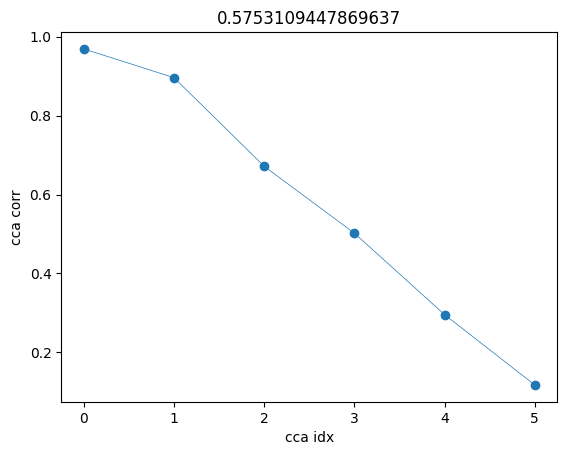

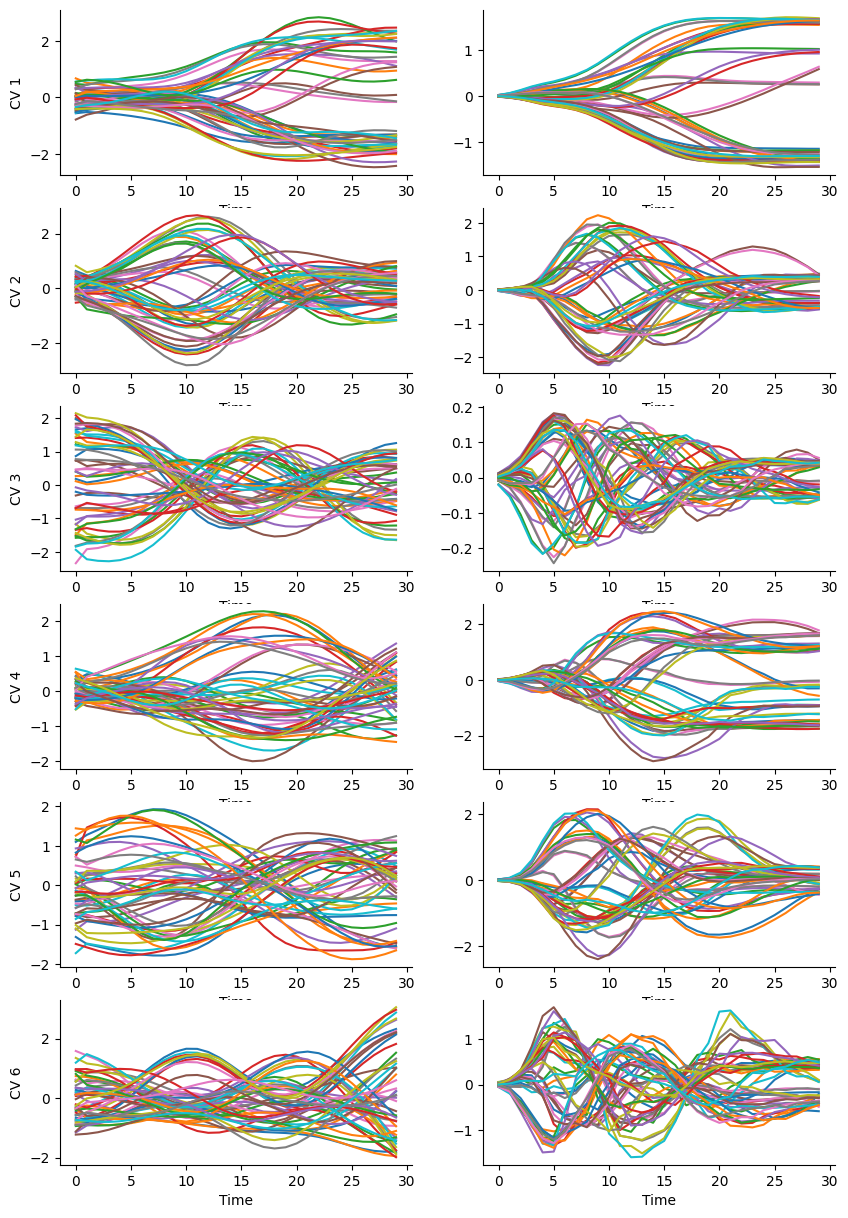

In [10]:


corrs = [np.corrcoef(U_c[:, i], V_c[:, i])[0, 1] for i in range(d)]    
plt.plot(corrs, marker='o', linewidth=0.5)
plt.xlabel('cca idx')
plt.ylabel('cca corr')
plt.title(np.mean(corrs))

U_c = U_c.reshape(K, T, d)
V_c = V_c.reshape(K, T, d)

n_cond = 50

fig, axs = plt.subplots(d, 2, figsize=(10,15))
for j in range(d): 
    for i in range(n_cond):
        axs[j, 0].plot(U_c[i,:,j])
        axs[j, 1].plot(V_c[i,:,j])

        axs[j, 0].set_ylabel(f'CV {j+1}')

for ax_row in axs:
    for ax in ax_row:
        #ax.set_ylabel('CV')
        ax.set_xlabel('Time')
        ax.spines[['right', 'top']].set_visible(False)